# Homework 5 - Question 2

In [1]:
import pycountry
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime
import nltk

In [2]:
filename = os.path.join('hillary-clinton-emails','Emails.csv')
df_email_initial = pd.read_csv(filename)
df_email_initial.head(2)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...


In [6]:
df_email = df_email_initial
# df_email = df_email_initial[["ExtractedSubject", "ExtractedBodyText"]]
df_email = df_email.dropna(axis=0, how='any', subset=['ExtractedBodyText'])
df_email.head(2)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...


In [27]:
countriesName = list(x.name for x in list(pycountry.countries))
results = pd.DataFrame(countriesName, columns=['country'])
results['sentiment'] = ""
results['frequency'] = ""
results.head(5)

,country,sentiment,frequency
0,Aruba,,
1,Afghanistan,,
2,Angola,,
3,Anguilla,,
4,Åland Islands,,


In [79]:
bad_countries_abbrev = ["RE", "FM", "TV", "AL", "AQ", "LA", "BEN", "and", "is", 'my', 'no', 'to', 'are', 'in', 'so', 'at',
                       'as', 'be', 'by', 'can', 'it', 'am', 'as']
bad_countries_abbrev = [abb.lower() for abb in bad_countries_abbrev]

In [80]:
def formatCountry(word):
    return (' ' + word + ' ').lower()

def makeCountryTable(country):
    countryArr = [country.name.lower()]
    if(country.alpha_2.lower() not in bad_countries_abbrev):
        countryArr.append(formatCountry(country.alpha_2))
    if(country.alpha_3.lower() not in bad_countries_abbrev):
        countryArr.append(formatCountry(country.alpha_3))
    if hasattr(country, 'official_name'):
        countryArr.append(country.official_name.lower())
    
    return countryArr    

In [81]:
countryNamesAbbrev = list(makeCountryTable(x) for x in list(pycountry.countries))

In [136]:
def analyzeSentimentInDf(row):
    emailContent = str(row.ExtractedBodyText).lower()
#     if('assange' in emailContent):
#             if (row.ExtractedSubject):
#                 print("Subject: ",row.ExtractedSubject, "\n")
#             print(emailContent)
#             print('-----------------------------------------------------------------------------')
    foundCountryGlobal = False
    for country in countryNamesAbbrev:
        foundCountry = False
        for abrev in country:
#             print(abrev)
            if not foundCountry and abrev in emailContent:
                if(not foundCountryGlobal):
                    print('------------------------------- EMAIL N0: ', row.Id, ' -------------------------------')
                    print('COUNTRIES:')
                foundCountry = True
                foundCountryGlobal = True
                print(country[0], ': ',abrev)
    if foundCountryGlobal:
        pass
        print('--------- EMAIL CONTENT ---------')

        print(emailContent)
#         if any(abrev in emailContent for abrev in country):
#             print(abrev)
#         print(emailContent)
#         if('9.11' in emailContent):
#             print(emailContent)
#             print('-----------------------------------------------------------------------------')
#             print('-----------------------------------------------------------------------------')

#         if any(abrev in emailContent for abrev in country):
#             print('hey')

In [137]:
sample_email = df_email.head(100)
# sample_email = df_email
sample_email.apply(analyzeSentimentInDf, axis=1)
print('finished!')

------------------------------- EMAIL N0:  2  -------------------------------
COUNTRIES:
libya :  libya
--------- EMAIL CONTENT ---------
b6
thursday, march 3, 2011 9:45 pm
h: latest how syria is aiding qaddafi and more... sid
hrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx
march 3, 2011
for: hillary
------------------------------- EMAIL N0:  5  -------------------------------
COUNTRIES:
libya :  libya
--------- EMAIL CONTENT ---------
h <hrod17@clintonemail.com>
friday, march 11, 2011 1:36 pm
huma abedin
fw: h: latest: how syria is aiding qaddafi and more... sid
hrc memo syria aiding libya 030311.docx
pis print.
------------------------------- EMAIL N0:  8  -------------------------------
COUNTRIES:
libya :  libya
--------- EMAIL CONTENT ---------
h <hrod17@clintonemail.corn>
friday, march 11, 2011 1:36 pm
huma abedin
fw: h: latest: how syria is aiding qaddafi and more... sid
hrc memo syria aiding libya 030311.docx
pis print.
--------------------------

In [71]:
x = ['a', 'b', 'c']
b = ['a'] if 'aa' in x else ''
[a if a is 'a' else 'b' for a in x]

['a', 'b', 'b']

In [117]:
print('hey')

hey


In [ ]:
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')

In [143]:
from nltk.classify import NaiveBayesClassifier, MaxentClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC
import nltk.sentiment.util

naive_bayes = NaiveBayesClassifier.train
svm = SklearnClassifier(LinearSVC()).train
maxent = MaxentClassifier.train

nltk.sentiment.util.demo_vader_instance(df_email.ExtractedBodyText[13])

{'pos': 0.111, 'neu': 0.8, 'neg': 0.089, 'compound': 0.9881}


Positive


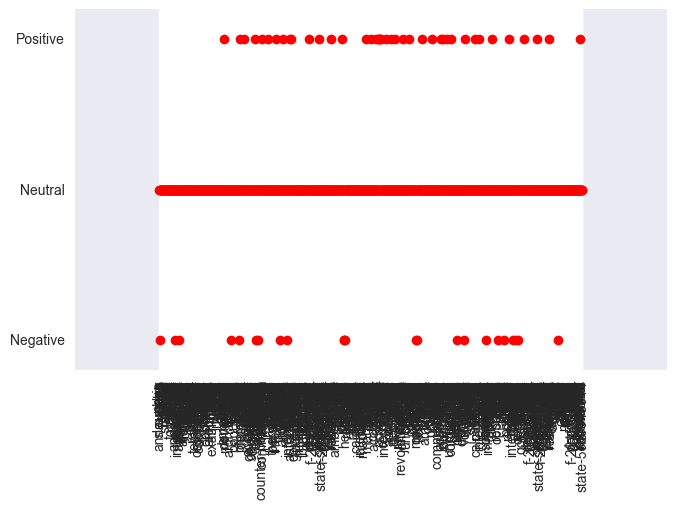

In [144]:
nltk.sentiment.util.demo_liu_hu_lexicon(df_email.ExtractedBodyText[13], plot=True)

In [145]:
def my_demo_liu_hu_lexicon(sentence, plot=False):
    """
    Basic example of sentiment classification using Liu and Hu opinion lexicon.
    This function simply counts the number of positive, negative and neutral words
    in the sentence and classifies it depending on which polarity is more represented.
    Words that do not appear in the lexicon are considered as neutral.
    :param sentence: a sentence whose polarity has to be classified.
    :param plot: if True, plot a visual representation of the sentence polarity.
    """
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    neut_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) # x axis for the plot
    y = []

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            print('positive: ',word)
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            print('negative: ', word)
            neg_words += 1
            y.append(-1) # negative
        else:
            neut_words += 1
            y.append(0) # neutral
    print('Positive words: ', pos_words)
    print('Negative words: ', neg_words)
    print('Neutral words: ', neut_words)

    if pos_words > neg_words:
        print('Positive')
    elif pos_words < neg_words:
        print('Negative')
    elif pos_words == neg_words:
        print('Neutral')


In [146]:
my_demo_liu_hu_lexicon(df_email.ExtractedBodyText[13])

negative:  slaughter
negative:  slaughter
negative:  slaughter
positive:  support
negative:  issue
negative:  cynical
positive:  support
positive:  support
positive:  support
negative:  violent
negative:  hard
positive:  thoughtful
positive:  important
positive:  right
negative:  falling
positive:  important
negative:  opposition
positive:  astonishingly
positive:  support
positive:  support
positive:  sensitive
positive:  sensitive
positive:  decisive
negative:  inflict
negative:  damage
negative:  tanks
positive:  survivor
positive:  regard
positive:  capable
positive:  enough
positive:  gain
positive:  advantage
positive:  enough
positive:  willing
positive:  well
positive:  work
positive:  rosy
positive:  wins
negative:  massacres
negative:  opposition
positive:  support
positive:  promises
positive:  accomplish
positive:  intelligence
positive:  easier
positive:  neat
negative:  reluctance
negative:  ragged
positive:  brave
positive:  well
positive:  intelligence
negative:  opposi

In [142]:
# df_email.ExtractedBodyText[13]